In [ ]:
from functools import *
from itertools import *

## Recursion

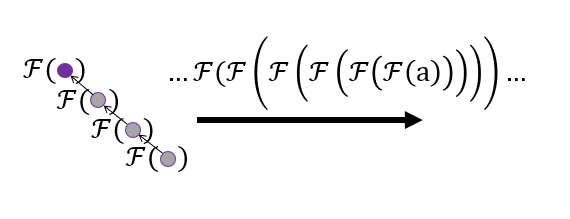

In [1]:
def factorial(n):
    print("factorial has been called with n = " + str(n))
    if n == 1:
        return 1
    else:
        res = n * factorial(n-1)
        print("intermediate result for ", n, " * factorial(" ,n-1, "): ",res)
        return res

In [2]:
factorial(4)

factorial has been called with n = 4
factorial has been called with n = 3
factorial has been called with n = 2
factorial has been called with n = 1
intermediate result for  2  * factorial( 1 ):  2
intermediate result for  3  * factorial( 2 ):  6
intermediate result for  4  * factorial( 3 ):  24


24

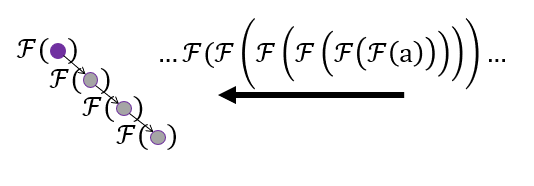

In [5]:
from functools import *
def facR(n):
    return reduce(lambda x,y: x*y ,range(1,n+1))

In [6]:
facR(4)

24

# Fibbinoci

$x_0 = 0$
\
$x_1 = 1$
\
$x_n = x_{(n-1)}+x_{(n-2)}$

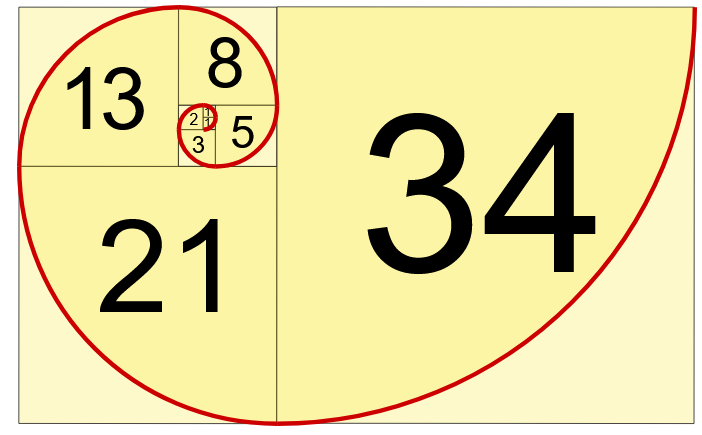

In [7]:
def fib(n):
    print(f"Called with {n}")
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [8]:
fib(9)

Called with 9
Called with 8
Called with 7
Called with 6
Called with 5
Called with 4
Called with 3
Called with 2
Called with 1
Called with 0
Called with 1
Called with 2
Called with 1
Called with 0
Called with 3
Called with 2
Called with 1
Called with 0
Called with 1
Called with 4
Called with 3
Called with 2
Called with 1
Called with 0
Called with 1
Called with 2
Called with 1
Called with 0
Called with 5
Called with 4
Called with 3
Called with 2
Called with 1
Called with 0
Called with 1
Called with 2
Called with 1
Called with 0
Called with 3
Called with 2
Called with 1
Called with 0
Called with 1
Called with 6
Called with 5
Called with 4
Called with 3
Called with 2
Called with 1
Called with 0
Called with 1
Called with 2
Called with 1
Called with 0
Called with 3
Called with 2
Called with 1
Called with 0
Called with 1
Called with 4
Called with 3
Called with 2
Called with 1
Called with 0
Called with 1
Called with 2
Called with 1
Called with 0
Called with 7
Called with 6
Called with 5
Called

34

In [9]:
def factorialNC(n):
    if n == 1:
        return 1
    else:
        res = n * factorialNC(n-1)
        return res

In [11]:
factorialNC(1001)

RecursionError: maximum recursion depth exceeded in comparison

In [12]:

import sys
x=1500
sys.setrecursionlimit(x)

In [13]:
factorialNC(1001)

4027896473371708673172461363569269897050942390749253471763437103403684509110276496126362526954563742052804685988073932546902985398678033674602251534996145355884219285911608336787424513549159212522992854569462713969958504379595406450196963727411427873474502813253243738244563002268716094314978269894891095227257916911679456985092824215386329665233766798918236969009820752231882794651940654891114985865229975733078380579349947062129342914778822214649140587458081797951300189691756057398242372476845127901696480137781586615203849163572855472196603375040679100879363015808746623675439212889882082619448341783691698056824894205040383345293891778450896795460750233058540061412562886338200799403953292515637883994046529021545193029283651694523835310307556845785038514881540923235761503115693258911901059261187616071002868279304729449132724208250789121587415898501360170308879754529224348896887758833869778252159044236824789433138060721440974324186958074125712923087398024810894070025239550801481840628104475

In [14]:
memo = {0:0, 1:1}
def fibm(n):
    if not n in memo:
        print(f"Calc:{n}")
        memo[n] = fibm(n-1) + fibm(n-2)
    return memo[n]

In [15]:
fibm(9)

Calc:9
Calc:8
Calc:7
Calc:6
Calc:5
Calc:4
Calc:3
Calc:2


34

# Use Generators to go forward from a seed

In [43]:
from itertools import *
def fibTerm(a,b):
    return b,a+b

def fibSeq():
    yield 0
    
    yield 1
    nminus1 = 0
    n = 1
    while True:
        nminus1,n = n,n+nminus1
        yield n

In [45]:
s = fibSeq()
list(islice(s,0,600))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [46]:
type(s)

generator

In [22]:
s = fibSeq()
list(islice(s,2000,2001))

[4224696333392304878706725602341482782579852840250681098010280137314308584370130707224123599639141511088446087538909603607640194711643596029271983312598737326253555802606991585915229492453904998722256795316982874482472992263901833716778060607011615497886719879858311468870876264597369086722884023654422295243347964480139515349562972087652656069529806499841977448720155612802665404554171717881930324025204312082516817125]

In [24]:
def fibSeqTerm(T1,T2):
    return (T1[1],T1[0]+T1[1])


In [25]:

fibSeqTerm((0,1),(0,0))

(1, 1)

In [26]:
seed = repeat((0,1))
list(islice(accumulate(seed,fibSeqTerm),0,10))

[(0, 1),
 (1, 1),
 (1, 2),
 (2, 3),
 (3, 5),
 (5, 8),
 (8, 13),
 (13, 21),
 (21, 34),
 (34, 55)]

In [27]:
fibA = accumulate(repeat((0,1)),lambda T1,T2:(T1[1],T1[0]+T1[1]))

In [28]:
fibB = map(lambda x:x[0],fibA)
list(islice(fibB,0,10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [31]:
next(fibB)

144